# Predicting Wine Quality from Chemical Characteristics
## Team 3 Final Project

Team 3 Members:  Tyler Foreman, Daniel Grant
Date:  June 6, 2023


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import statistics
import seaborn as sns



## Exploratory Data Analysis
 
 - Load data into dataframe
 - Generate and review descriptive statistics of the dataset/variables
 - Plot visualization of data spread for each variable
 - Review and plot correlations of variables to outcome (quality)
 - Possibly perform statistical analysis of variable correlations to outcomes
 - Analyze and develop hypothesis of varialbes with weak correlation to output (and can be excluded during feature selection)
 


In [2]:
# Start code here
white_wines_full = pd.read_csv('./winequality-white.csv', sep=';')

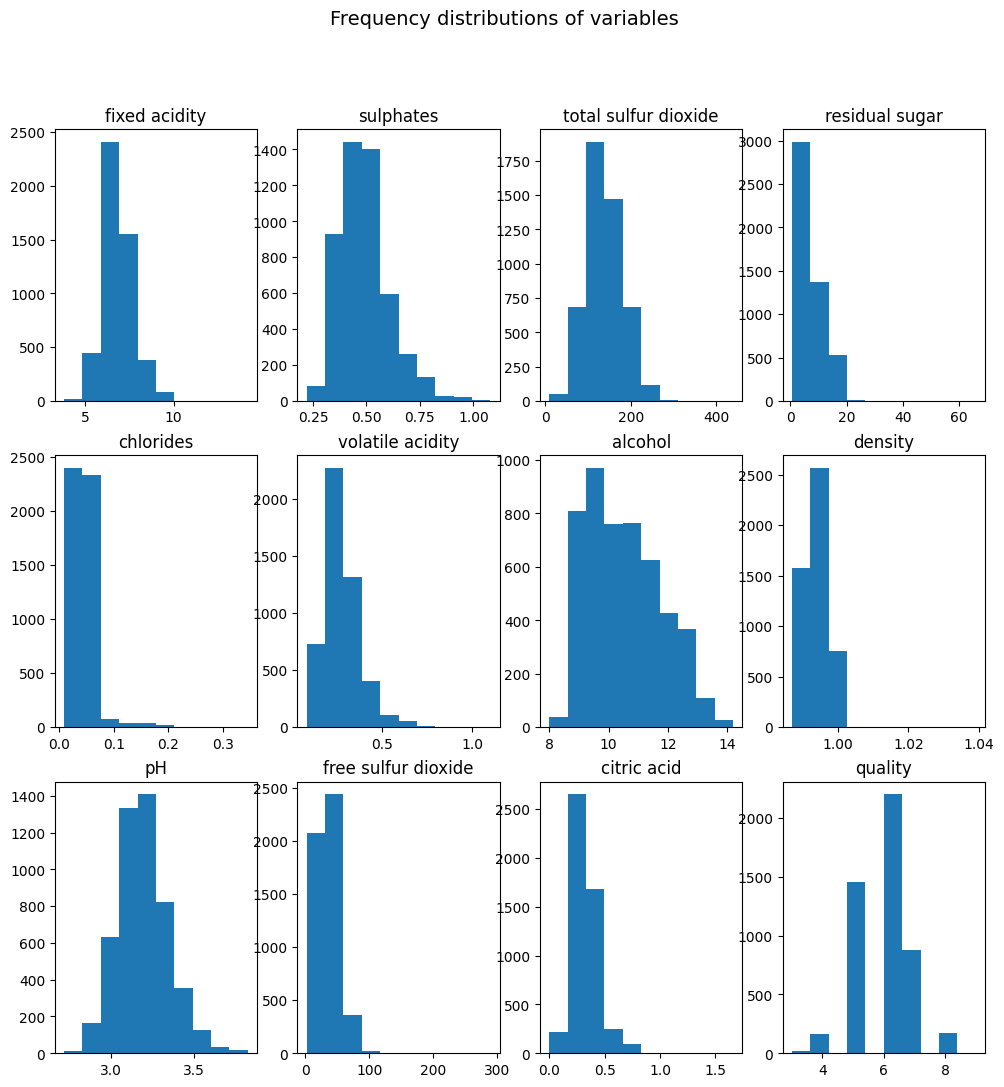

In [3]:
# plot variable distributions
fig, ax_list = plt.subplots(3, 4)
fig.set_figheight(12)
fig.set_figwidth(12)

#iterate columns (variables) and plot freqeuncy distribution
for i in range(0, len(white_wines_full.columns)):
    col = white_wines_full.columns[i]
    plt_ax = ax_list[i % 3, i % 4]
    plt_ax.hist(white_wines_full[col])
    plt_ax.set_title(col)

fig.suptitle('Frequency distributions of variables', fontsize=14)
plt.show()

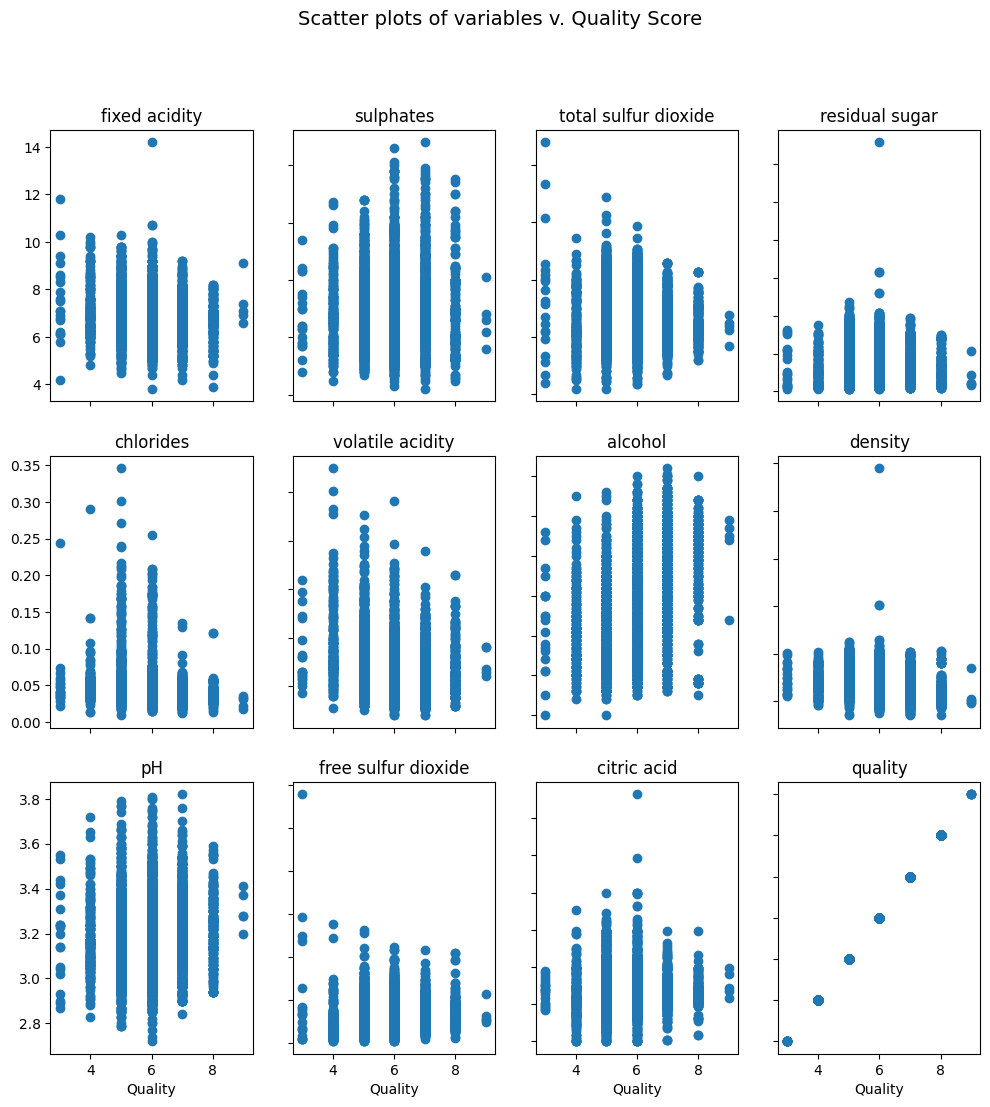

In [4]:
# plot variables vs. output
fig, ax_list = plt.subplots(3, 4)
fig.set_figheight(12)
fig.set_figwidth(12)

# iterate columns (variables) and plot vs. outcome
for i in range(0, len(white_wines_full.columns)):
    col = white_wines_full.columns[i]
    plt_ax = ax_list[i % 3, i % 4]
    plt_ax.scatter(white_wines_full['quality'], white_wines_full[col])
    plt_ax.set_title(col)
    plt_ax.set(xlabel='Quality')
    plt_ax.label_outer()

fig.suptitle('Scatter plots of variables v. Quality Score', fontsize=14)
plt.show()

In [5]:
# Conduct Pearson correlation tests on each variable 
print("Pearson correlation coefficient for variables:")
for i in range(0, len(white_wines_full.columns)):
    col = white_wines_full.columns[i]
    corr = stats.pearsonr(white_wines_full[col], white_wines_full['quality'])
    print("{: >20} : {: >20}".format(col, round(corr[0], 4)))

Pearson correlation coefficient for variables:
       fixed acidity :              -0.1137
    volatile acidity :              -0.1947
         citric acid :              -0.0092
      residual sugar :              -0.0976
           chlorides :              -0.2099
 free sulfur dioxide :               0.0082
total sulfur dioxide :              -0.1747
             density :              -0.3071
                  pH :               0.0994
           sulphates :               0.0537
             alcohol :               0.4356
             quality :                  1.0



## Data Cleaning
 - Evaluate for possible corrupted values (ie: possibly erronous)
 - Evaluate for any missing data/data gaps
 - Remove any entries that are missing data or appear to be erronous
 

In [6]:
# Start code here
# Drop any null values, duplicates, and round all numbers to certain decimal places.
white_wines_full.dropna()
white_wines_full.drop_duplicates()
decimals = pd.Series([1,2,2,1,3,0,0,3,2,2,1,0], index=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
white_wines_full.round(decimals)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.995,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.991,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.995,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.993,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.989,3.34,0.38,12.8,7


In [7]:
des = white_wines_full.describe()
round(des, 2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


In [8]:
white_wines_full.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3552,5.7,0.22,0.22,16.65,0.044,39.0,110.0,0.99855,3.24,0.48,9.0,6


## Data Preparation
-  Slice dataframe into multiple dataframes that contain subset of variables for feature selection experimentation (based on exploratory data analysis)
-  Keep full feature dataset as control set (ie: to compare model performance of feature selected datasets to the full dataset)
-  Split each experimental dataframe into test/train/validate datasets (80/10/10)
-  Perform any normalization of variables if necessary

In [9]:
# Start code here


## Model Selection
-  Identify 2 models to conduct experiements with (ie: SVM and Logistic Regresssion)
-  Train the 2 models on the full feature dataset
-  Test against test dataset
-  Tune hyperparameters as necessary to optimize performance
-  Repeat until optimized
-  Once optimized, retrain instances on the feature selected experimental data sets


In [10]:
# Start code here

## Model Analysis

-  For full feature data set:
    -  Run models against validation data sets 
    -  Evaluate performance
    -  Compare peformance of two models against validation sets
    -  Make recommendation on model selection

- For each experimental feature selected dataset:
    -  Run models against validation data sets 
    -  Evaluate performance
    -  Compare peformance of two models against validation sets
    -  Make recommendation on feature selection (which features are important and those that are not for making accurate predictions)



In [11]:
# Start code here